# Kaggle Titanic Competition

## 1) Import Packages

In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action = 'ignore')

## 2) Read Files

In [628]:
train = pd.read_csv('train.csv')

In [629]:
test = pd.read_csv('test.csv')

## 3) Data Analysis & Preprocessing

In [630]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [631]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [632]:
train.drop('Cabin', axis = 1, inplace = True)

In [633]:
test.drop('Cabin', axis = 1, inplace = True)

In [634]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [635]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Fare'>

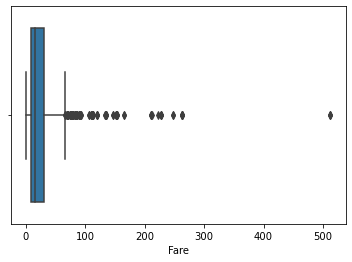

In [636]:
sns.boxplot(x = train['Fare'])

### Pclass별 생존

<AxesSubplot:xlabel='Pclass', ylabel='count'>

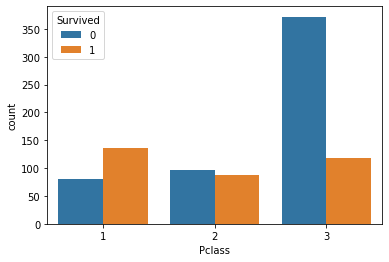

In [637]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

### 성별별 생존

<AxesSubplot:xlabel='Sex', ylabel='count'>

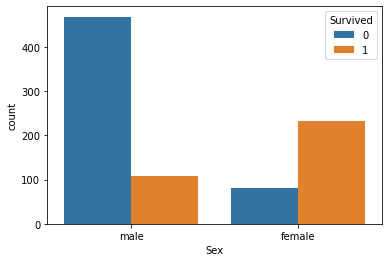

In [638]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

### age_grouping

In [639]:
def age_group(x):
    if x<10:
        return 'b10'
    elif x<20:
        return 'b20'
    elif x<30:
        return 'b30'
    elif x<40:
        return 'b40'
    else :
        return 'senior'

In [640]:
train['grouped_age'] = train['Age'].apply(age_group)

In [641]:
age_sort_lst = ['b10', 'b20', 'b30', 'b40', 'senior']

### 연령대별 생존

<AxesSubplot:xlabel='grouped_age', ylabel='count'>

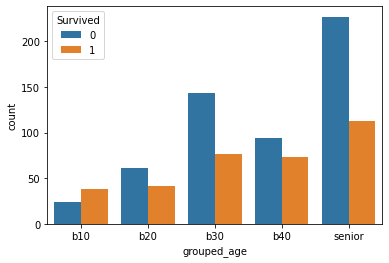

In [642]:
sns.countplot(data = train, x = 'grouped_age', hue = 'Survived', order = age_sort_lst)

In [643]:
train.drop('grouped_age', axis = 1, inplace = True)

## 3-1) Fare 이상치 처리

In [644]:
train[train['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [645]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [646]:
train.iloc[[258, 679, 737],9] = train['Fare'].quantile(0.996)

<AxesSubplot:xlabel='Fare'>

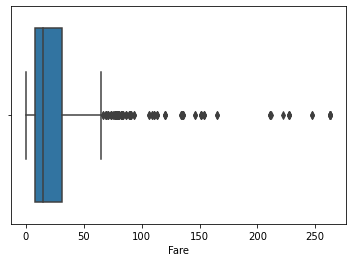

In [647]:
sns.boxplot(data = train, x = 'Fare')

## 3-2) Embarked 결측치 처리

In [648]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [649]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [650]:
train[train['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [651]:
train[train['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

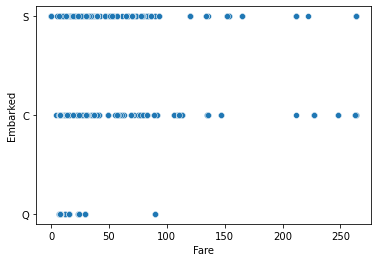

In [652]:
sns.scatterplot(data = train, x = 'Fare',y = 'Embarked')

In [653]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Fare가 80 이상일때 S, C, Q에서 승선했을 각각의조건부 확률

In [654]:
((train['Embarked'] == 'S') & (train['Fare']>=80)).sum()/(train['Fare']>=80).sum()

0.4473684210526316

In [655]:
((train['Embarked'] == 'C') & (train['Fare']>=80)).sum()/(train['Fare']>=80).sum() #Highest

0.5

In [656]:
((train['Embarked'] == 'Q') & (train['Fare']>=80)).sum()/(train['Fare']>=80).sum()

0.02631578947368421

In [657]:
train.iloc[[61, 829],10] = 'C' #Embarked nan값 'C'로 채움

In [658]:
train.iloc[[61, 829],10]

61     C
829    C
Name: Embarked, dtype: object

## 3-3) Age 결측치 처리

### 3-3-1) Age Modeling을 위한 데이터셋 선정

In [659]:
def sex(x):
    if x == 'male':
        return 0
    else:
        return 1
    
def Emb(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    else :
        return 2

In [660]:
train['Sex_n'] = train['Sex'].apply(sex)
train['Embarked_n'] = train['Embarked'].apply(Emb)

test['Sex_n'] = test['Sex'].apply(sex)
test['Embarked_n'] = test['Embarked'].apply(Emb)

In [661]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_n,Embarked_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,0


In [662]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_n,Embarked_n
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,2


In [663]:
test.iloc[152, 8] = train[train['Pclass'] == 3]['Fare'].mean()

In [664]:
train_age_filled = train[train['Age'].notnull()]

In [665]:
test_age_filled = test[test['Age'].notnull()]

In [666]:
df_for_age = pd.concat([train_age_filled, test_age_filled], axis = 0)

In [667]:
df_for_age.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_n', 'Embarked_n'],
      dtype='object')

In [668]:
#age_features = ['Pclass', 'SibSp','Parch', 'Fare', 'Sex_n', 'Embarked_n']

age_features = ['Pclass', 'SibSp', 'Parch', 'Embarked_n']#차원축소

### 차원 축소를 위해 시각화

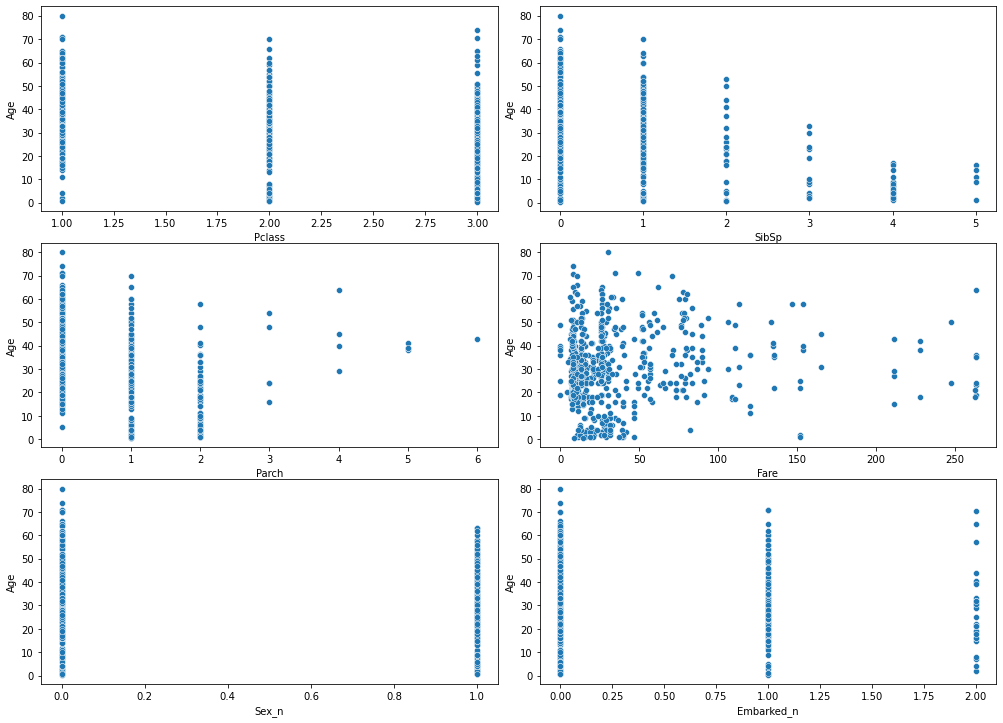

In [669]:
var_lst = ['Pclass', 'SibSp','Parch', 'Fare', 'Sex_n', 'Embarked_n']
figure, ax = plt.subplots(3,2)
figure.set_size_inches(14,10)
figure.tight_layout()
order = 0
for i in range (3):
    for j in range (2):
        sns.scatterplot(data = train, y = 'Age', x = var_lst[order], ax = ax[i,j])
        order += 1

In [670]:
age_target = ['Age']

In [671]:
age_X = df_for_age.loc[:,age_features ]

In [672]:
age_y = df_for_age.loc[:,age_target]

### 3-3-2) Modeling for age prediction

In [673]:
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(age_X, age_y, random_state =42, train_size = 0.9)

In [674]:
LR_age_model = LinearRegression()

In [675]:
RF_age_model = RandomForestRegressor(random_state = 42)

In [676]:
LR_age_model.fit(age_X_train, age_y_train)

LinearRegression()

In [677]:
RF_age_model.fit(age_X_train, age_y_train)

RandomForestRegressor(random_state=42)

In [678]:
LR_age_pred = LR_age_model.predict(age_X_test)

In [679]:
RF_age_pred = RF_age_model.predict(age_X_test)

In [680]:
LR_age_model.score(age_X_test, age_y_test)

0.24283231264368232

In [681]:
LR_age_model.score(age_X_train, age_y_train)

0.21826244437039022

In [682]:
RF_age_model.score(age_X_train, age_y_train)

0.37481480966582414

In [683]:
RF_age_model.score(age_X_test, age_y_test) #RF 모델 사용

0.31572793921142306

In [684]:
RF_age_model.fit(age_X, age_y)

RandomForestRegressor(random_state=42)

### ↑모델 피팅, 선정 과정

In [685]:
train_age_unfilled = train[train['Age'].isna()]

In [686]:
train_age_unfilled = train[train['Age'].isna()]

In [687]:
train_age_pred_X = train_age_unfilled.loc[:,['Pclass', 'SibSp', 'Parch', 'Embarked_n']]

In [688]:
test_age_pred_X = test_age_unfilled.loc[:,['Pclass', 'SibSp', 'Parch', 'Embarked_n']]

In [689]:
train_age_pred = RF_age_model.predict(train_age_pred_X)

In [690]:
train.loc[train['Age'].isna(),'Age'] = train_age_pred

In [693]:
test_age_pred = RF_age_model.predict(test_age_pred_X)

In [695]:
test.loc[test['Age'].isna(),'Age'] = test_age_pred

In [696]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Sex_n        891 non-null    int64  
 12  Embarked_n   891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [697]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Sex_n        418 non-null    int64  
 11  Embarked_n   418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


# 4) 생존자 예측 모델링

In [698]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_n', 'Embarked_n'],
      dtype='object')

In [711]:
sur_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_n', 'Embarked_n']

In [712]:
sur_target = ['Survived']

In [713]:
X = train.loc[:,sur_feature]

In [714]:
y = train.loc[:,sur_target]

In [863]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

In [864]:
train_RF_model = RandomForestClassifier(random_state = 42, min_samples_leaf=3, min_samples_split=2)

In [865]:
train_DT_model = DecisionTreeClassifier(random_state = 42)

In [866]:
train_LR_model = LogisticRegression(random_state = 42)

In [867]:
train_RF_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [868]:
train_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [869]:
train_LR_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [870]:
RF_pred = train_RF_model.predict(X_test)

In [871]:
DT_pred = train_DT_model.predict(X_test)

In [872]:
LR_pred = train_LR_model.predict(X_test)

In [873]:
(RF_pred == y_test['Survived']).sum()/len(y_test['Survived'])

0.8324022346368715

In [874]:
(DT_pred == y_test['Survived']).sum()/len(y_test['Survived'])

0.7988826815642458

In [875]:
(LR_pred == y_test['Survived']).sum()/len(y_test['Survived'])

0.8044692737430168

### Grid search

In [843]:
params={'n_estimators':[88, 89, 90], 
        'min_samples_split' : [2,3,4],
        'min_samples_leaf' : [1,2,3]
       }

forest_model = RandomForestClassifier(random_state = 42)
grid = GridSearchCV(forest_model,
                    params, cv = 5,
                    scoring = 'accuracy',
                    n_jobs = -1)# cv : 교차검증 0이 디폴트
                                # n_jobs : 우선순위로 하겠다는 뜻
    
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [88, 89, 90]},
             scoring='accuracy')

In [842]:
print(grid.best_score_)
print(grid.best_params_)

0.8218064516129031
{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 90}


In [876]:
train_RF_model.fit(X, y)

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [879]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Sex_n', 'Embarked_n'],
      dtype='object')

In [881]:
submission_X = test.loc[:,sur_feature]

In [882]:
result = train_RF_model.predict(submission_X)

In [885]:
pd.DataFrame(result).to_csv('result.csv')